# 4 Explratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from datetime import datetime
%matplotlib inline

In [ ]:
data_folder = '../input/'
figure_folder = '../final_report/figures/'

## 4.1 Store Information

In [3]:
stores =pd.read_csv(data_folder + 'stores.csv',index_col='store_nbr')

In [5]:
stores.shape

(54, 4)

In [4]:
stores.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
#Create dictionary with store number as key and type as value
store_type_dict = {}
for i,j in zip(stores.index, stores.type):
    store_type_dict[i] = j

In [7]:
print(f'number of states: {stores.state.nunique()}')
print(f'number of cities: {stores.city.nunique()}')

number of states: 16
number of cities: 22


In [13]:
store_plot = stores.groupby(["city", "type"])['cluster'] \
    .size() \
    .rename(columns={'type': 'type_count'}) \
    .unstack(level=1) \
    .fillna(0)

In [10]:
store_plot.head()

type,A,B,C,D,E
city,,,,,
Ambato,1.0,0.0,0.0,1.0,0.0
Babahoyo,0.0,1.0,0.0,0.0,0.0
Cayambe,0.0,1.0,0.0,0.0,0.0
Cuenca,0.0,1.0,0.0,2.0,0.0
Daule,0.0,0.0,0.0,1.0,0.0


9896

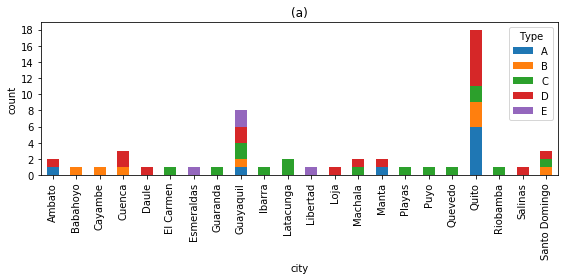

In [14]:
store_plot.plot(kind="bar", stacked=True, figsize=(8, 4))
plt.legend(title='Type')
plt.ylabel("count")
plt.yticks(np.arange(0, 20, 2.0))
plt.title('(a)')
plt.tight_layout()
plt.savefig(figure_folder + 'city_store.png');

del store_plot; gc.collect()

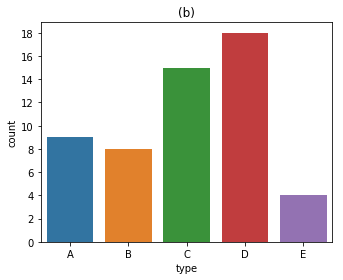

In [16]:
plt.figure(figsize=(5,4))
type_order = np.sort(stores.type.unique())
sns.countplot(data=stores,x = 'type',order=type_order)
plt.title('(b)')
plt.tight_layout()
plt.yticks(np.arange(0, 20, 2.0))
plt.savefig(figure_folder + '/store_type.png');

8241

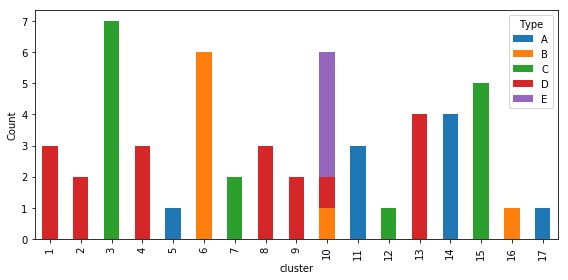

In [18]:
cluster_plot = stores.groupby(["cluster", "type"])['city'] \
    .size() \
    .rename(columns={'type': 'type_count'}) \
    .unstack(level=1) \
    .fillna(0)
cluster_plot.plot(kind="bar", stacked=True, figsize=(8, 4))
plt.legend(title='Type')
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(figure_folder + '/store_cluster.png');

del cluster_plot; gc.collect()

## 4.2 Item Information

In [19]:
items = pd.read_csv(data_folder + 'items.csv', index_col='item_nbr')

In [20]:
items.head()

,family,class,perishable
item_nbr,,,
96995,GROCERY I,1093,0
99197,GROCERY I,1067,0
103501,CLEANING,3008,0
103520,GROCERY I,1028,0
103665,BREAD/BAKERY,2712,1


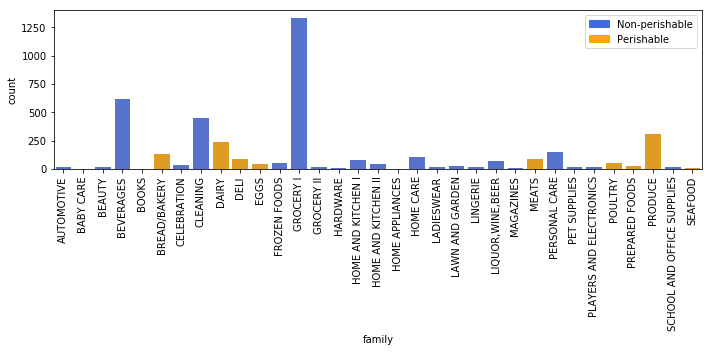

In [22]:
plt.figure(figsize=(10,5))

family_perishable_dict = {k:v for k,v in items.groupby('family')['perishable'].mean().iteritems()}
family_list = np.sort(items.family.unique())
color_map = {0:'royalblue',1:'orange'}
family_color = [color_map[family_perishable_dict[family]] for family in family_list]

sns.countplot(x=items.family,color='royalblue', order = family_list,palette=family_color)
plt.xticks(rotation=90)

legend_labels = ['Non-perishable','Perishable']
legend_color = ['royalblue','orange']
legend_patches = [matplotlib.patches.Patch(color=C, label=L) for
              C, L in zip(legend_color, legend_labels)]
plt.legend(loc = 'upper right', handles=legend_patches)

plt.tight_layout()
plt.savefig(figure_folder + 'items_family.png');

In [23]:
#Create Item Family Dict for future Use
item_family_dict = {k:v for k, v in items.family.iteritems()}

## 4.3 Oil Price

In [24]:
oil = pd.read_csv(data_folder + 'oil.csv',parse_dates = ['date']).set_index('date')

In [25]:
begin_date = oil.index.min()
end_date = oil.index.max()
oil = oil.reindex(pd.date_range(begin_date, end_date), fill_value=np.nan)

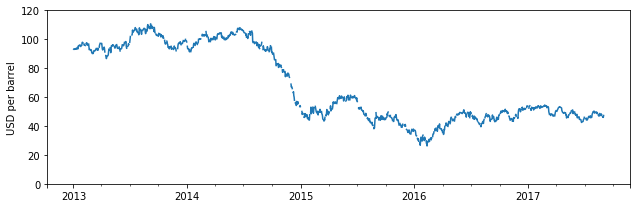

In [26]:
ax = oil.plot(figsize=(9,3))
ax.set_ylim([0,120])
ax.get_legend().remove()
ax.set_ylabel('USD per barrel')
plt.tight_layout()
plt.savefig(figure_folder + 'oil.png');

## 4.4 Holidays and Events

In [27]:
holidays = pd.read_csv(data_folder + 'holidays_events.csv')

In [28]:
holidays.date = pd.to_datetime(holidays.date)

In [31]:
# Explore holidays and events in August 2016
date_filter = (holidays.date >='2016-08-01') & (holidays.date <= '2016-08-31')
holidays[date_filter]

,date,type,locale,locale_name,description,transferred
267,2016-08-05,Holiday,Local,Esmeraldas,Fundacion de Esmeraldas,False
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
270,2016-08-15,Holiday,Local,Riobamba,Fundacion de Riobamba,False
271,2016-08-24,Holiday,Local,Ambato,Fundacion de Ambato,False


## 4.5 Sales Data

In [32]:
train = pd.read_csv(data_folder + 'train.csv',parse_dates=['date'], 
                    dtype={'onpromotion':'bool'},index_col = 'id', na_values='NaN')

/opt/conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/fastai/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
train.columns

In [33]:
#save promotion data for store 45 in 2017 for promotion analysis
date_filter = (train.date >= '2016-01-01')
store_filter = (train.store_nbr == 45)
promo_45_df = train[date_filter & store_filter][['date','item_nbr','onpromotion']]

In [34]:
# save 2014/6 data for store #45 for World cup event data analysis
date_filter = (train.date >= '2014-06-01') & (train.date <= '2014-06-30')
store_filter = (train.store_nbr == 45)
train_45_2014 = train[date_filter & store_filter][['date','item_nbr','unit_sales']]

In [35]:
#limit data to 2016 and after
date_filter = train.date >= '2016-01-01'
train = train[date_filter]

In [36]:
gc.collect()

19456

In [37]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
66458908,2016-01-01,25,105574,12.0,False
66458909,2016-01-01,25,105575,9.0,False
66458910,2016-01-01,25,105857,3.0,False
66458911,2016-01-01,25,108634,3.0,False
66458912,2016-01-01,25,108701,2.0,True


In [38]:
# Fill in dates with 0 sales
train = train.set_index(['store_nbr','item_nbr','date'])[['unit_sales']].unstack(level = -1).fillna(0)

In [39]:
# stack the data so unit_sale is the only column
train = train.stack()

In [40]:
train.reset_index(inplace=True)

In [41]:
# merge with items table for family information
train = train.merge(items[['family']], on='item_nbr', right_index = True)
# merge with items table for city information
train = train.merge(stores[['city']], on='store_nbr', right_index = True)

In [43]:
train.head()

,store_nbr,item_nbr,date,unit_sales,family,city
0,1,96995,2016-01-01,0.0,GROCERY I,Quito
1,1,96995,2016-01-02,0.0,GROCERY I,Quito
2,1,96995,2016-01-03,0.0,GROCERY I,Quito
3,1,96995,2016-01-04,0.0,GROCERY I,Quito
4,1,96995,2016-01-05,0.0,GROCERY I,Quito


### 4.5.1 Effect of Store Types

In [56]:
def store_type_city_family_plot(family_var, fig_title, begin_date, city_var = None):
    type_color_map = {'A':'royalblue','B':'orange','C':'green','D':'red','E':'purple'}

    
    family_filter = (train.family == family_var)
    date_filter = (train.date >= begin_date)
    
    temp_df = pd.DataFrame(train[family_filter & date_filter].groupby('store_nbr')['unit_sales'].sum())
    
    type_color_list = list(stores['type'].map(type_color_map).values)
    sns.barplot(data = temp_df.reset_index(), x ='store_nbr', y='unit_sales', palette = type_color_list)
    plt.xlabel('Store Number')
    plt.ylabel('Total Unit Sales')
    plt.title(fig_title)
    legend_labels = ['A','B','C','D',"E"]
    legend_color = ['royalblue','orange','green','red','purple']
    legend_patches = [matplotlib.patches.Patch(color=C, label=L) for
                  C, L in zip(legend_color, legend_labels)]
    plt.legend(loc = 'upper center', handles=legend_patches, title = 'Store Type', ncol=3);

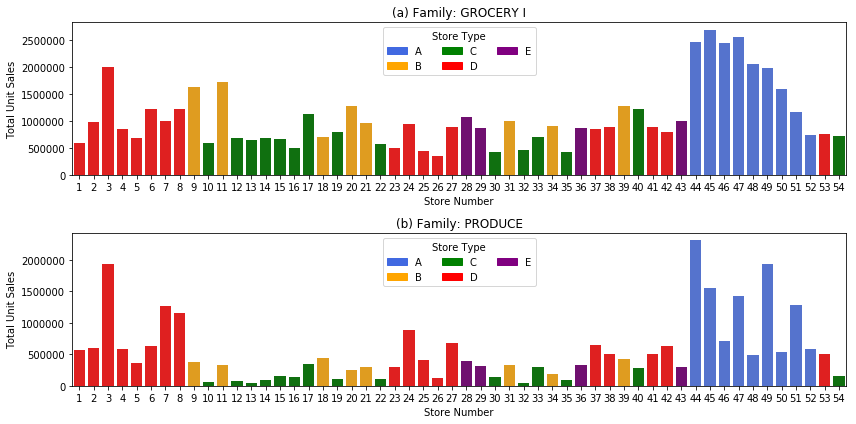

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
store_type_city_family_plot('GROCERY I', '(a) Family: GROCERY I', '2017-01-01')
plt.subplot(2,1,2)
store_type_city_family_plot('PRODUCE', '(b) Family: PRODUCE', '2017-01-01')
plt.tight_layout()
plt.savefig(figure_folder + 'store_type.png');

### 4.5.2 Effect of Locations

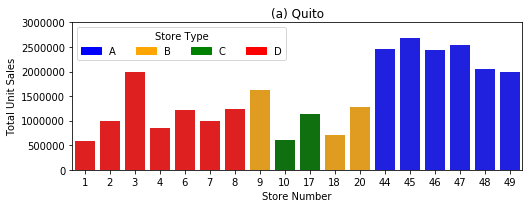

In [58]:
# Figure for Quito
type_color_map = {'A':'blue','B':'orange','C':'green','D':'red','E':'purple'}
family_var = 'GROCERY I'
city_var = 'Quito'
begin_date = '2017-01-01'

family_filter = (train.family == family_var)
date_filter = (train.date >= begin_date)
city_filter = (train.city == city_var)

temp_df = pd.DataFrame(train[family_filter & date_filter & city_filter].groupby('store_nbr')['unit_sales'].sum())

type_color_list = list(stores[stores.city == city_var]['type'].map(type_color_map).values)

plt.figure(figsize=(7.5,3))
sns.barplot(data = temp_df.reset_index(), x ='store_nbr', y='unit_sales', palette = type_color_list)
plt.xlabel('Store Number')
plt.ylabel('Total Unit Sales')
legend_labels = ['A','B','C','D']
legend_color = ['blue','orange','green','red']
legend_patches = [matplotlib.patches.Patch(color=C, label=L) for
              C, L in zip(legend_color, legend_labels)]
plt.title('(a) ' + city_var)
plt.legend(loc = 'upper left', handles=legend_patches, title = 'Store Type', ncol=4)
plt.ylim([0,3000000])
plt.tight_layout()
plt.savefig(figure_folder + 'store_type_quito.png');

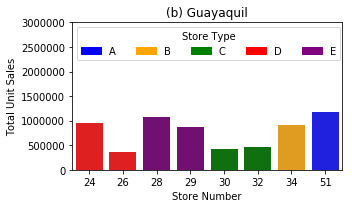

In [59]:
# Figure for Guayaquil
type_color_map = {'A':'blue','B':'orange','C':'green','D':'red','E':'purple'}
family_var = 'GROCERY I'
city_var = 'Guayaquil'
begin_date = '2017-01-01'

family_filter = (train.family == family_var)
date_filter = (train.date >= begin_date)
city_filter = (train.city == city_var)

temp_df = pd.DataFrame(train[family_filter & date_filter & city_filter].groupby('store_nbr')['unit_sales'].sum())

type_color_list = list(stores[stores.city == city_var]['type'].map(type_color_map).values)

plt.figure(figsize=(5,3))
sns.barplot(data = temp_df.reset_index(), x ='store_nbr', y='unit_sales', palette = type_color_list)
plt.xlabel('Store Number')
plt.ylabel('Total Unit Sales')
plt.ylim([0,3000000])
legend_labels = ['A','B','C','D','E']
legend_color = ['blue','orange','green','red','purple']
legend_patches = [matplotlib.patches.Patch(color=C, label=L) for
              C, L in zip(legend_color, legend_labels)]
plt.title('(b) ' + city_var)
plt.legend(loc = 'upper left', handles=legend_patches, title = 'Store Type', ncol=5)
plt.tight_layout()
plt.savefig(figure_folder + 'store_type_guayaquil.png');

### 4.5.3 Effect of Day of the Week

In [60]:
store_list = [1,3,9,17,45,46]

In [61]:
train.set_index(['store_nbr'],inplace=True)

In [62]:
train = train.loc[store_list]

In [63]:
gc.collect()

31444

In [64]:
train.reset_index(inplace=True)

In [65]:
train['day_of_week'] = train.date.dt.weekday_name

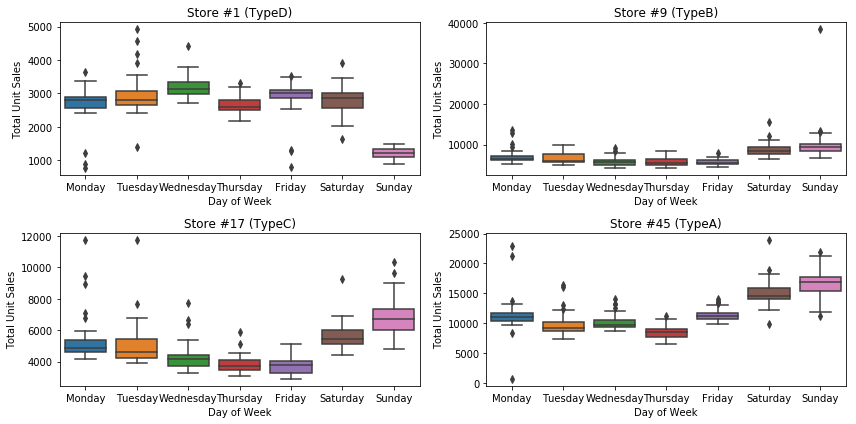

In [66]:
begin_date = '2017-01-02'
end_date ='2017-08-15'
family = 'GROCERY I'

plt.figure(figsize = (12,6))
for i, store_nbr in enumerate([1,9,17,45],1):
    plt.subplot(2,2,i)
    store_filter = (train.store_nbr == store_nbr)
    date_filter = (train.date >= begin_date) & (train.date <=end_date)
    family_filter = (train.family == family)
    temp_df = train[store_filter & date_filter & family_filter][['date','unit_sales','day_of_week']]
    temp_df = temp_df.groupby('date').aggregate({'unit_sales':sum, 'day_of_week':max})
    sns.boxplot(data=temp_df, x='day_of_week', y ='unit_sales', 
                order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    plt.xlabel('Day of Week')
    plt.ylabel('Total Unit Sales')
    plt.title(f'Store #{store_nbr} (Type{store_type_dict[store_nbr]})')
plt.tight_layout()
plt.savefig(figure_folder + 'dow_grocery.png');

In [ ]:
begin_date = '2017-01-02'
end_date ='2017-08-15'
family = 'PRODUCE'

plt.figure(figsize = (12,6))
for i, store_nbr in enumerate([1,9,17,45],1):
    plt.subplot(2,2,i)
    store_filter = (train.store_nbr == store_nbr)
    date_filter = (train.date >= begin_date) & (train.date <=end_date)
    family_filter = (train.family == family)
    temp_df = train[store_filter & date_filter & family_filter][['date','unit_sales','day_of_week']]
    temp_df = temp_df.groupby('date').aggregate({'unit_sales':sum, 'day_of_week':max})
    sns.boxplot(data=temp_df, x='day_of_week', y ='unit_sales', 
                order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    plt.xlabel('Day of Week')
    plt.ylabel('Total Unit Sales')
    plt.title(f'Store #{store_nbr} (Type{store_type_dict[store_nbr]})')
plt.tight_layout()
plt.savefig(figure_folder + 'dow_produce.png');

### 4.5.4 Effect of Holidays and Events

In [67]:
date_filter = (holidays.date >='2016-07-01') & (holidays.date <= '2016-08-31')
holidays[date_filter]

,date,type,locale,locale_name,description,transferred
261,2016-07-03,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False
262,2016-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False
263,2016-07-23,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False
264,2016-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
267,2016-08-05,Holiday,Local,Esmeraldas,Fundacion de Esmeraldas,False
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
270,2016-08-15,Holiday,Local,Riobamba,Fundacion de Riobamba,False


**Christmas and New Year**

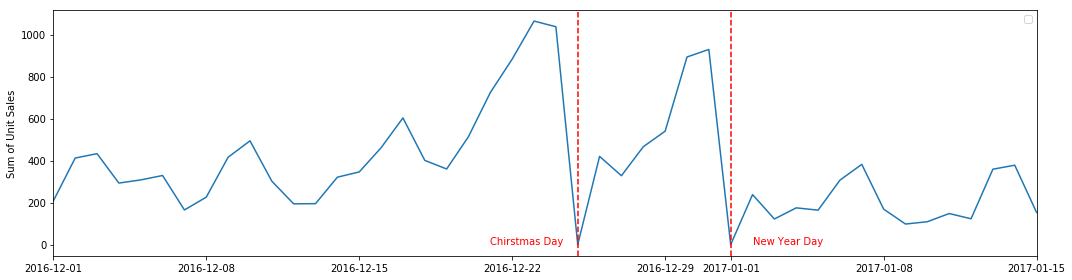

In [73]:
begin_date = '2016-12-01'
end_date= '2017-01-15'
store_nbr = 45
family = 'LIQUOR,WINE,BEER'
store_filter = (train.store_nbr == store_nbr)
date_filter = (train.date >= begin_date) & (train.date <= end_date)
family_filter = (train.family == family)

temp_df = train[store_filter & date_filter & family_filter][['date','unit_sales']]
temp_df = temp_df.groupby('date').aggregate({'unit_sales':sum})
temp_df = temp_df.reindex(pd.date_range(begin_date,end_date),fill_value=0)

plt.subplots(figsize=(15,4))
sns.lineplot(data = temp_df)
plt.xlim([begin_date,end_date])
plt.ylabel('Sum of Unit Sales')
plt.axvline('2016-12-25',color='red',linestyle='--')
plt.axvline('2017-01-01',color='red',linestyle='--')
plt.annotate('Chirstmas Day', ['2016-12-21',0],color='red')
plt.annotate('New Year Day', ['2017-01-02',0],color='red')
plt.legend('')
plt.tight_layout()
plt.savefig(figure_folder + 'christmas_new_year.png');

**National Day 2016**

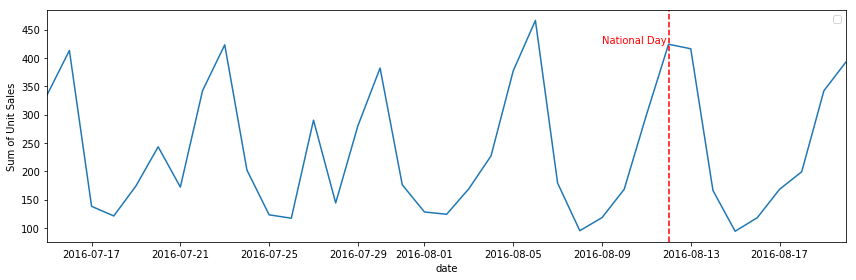

In [74]:
store_nbr = 45
begin_date = '2016-07-15'
end_date ='2016-08-20'
family = 'LIQUOR,WINE,BEER'

plt.figure(figsize = (12,4))
store_filter = (train.store_nbr == store_nbr)
date_filter = (train.date >= begin_date) & (train.date <=end_date)
family_filter = (train.family == family)
temp_df = train[store_filter & date_filter & family_filter][['date','unit_sales']]
temp_df = temp_df.groupby('date').aggregate({'unit_sales':sum})

sns.lineplot(data=temp_df)
plt.xlim([begin_date,end_date])
plt.ylabel('Sum of Unit Sales')
plt.axvline('2016-08-12', c='r', ls='--')
plt.annotate('National Day', ['2016-08-09',425], color='red')
plt.legend('')
plt.tight_layout()
plt.savefig(figure_folder + 'national_day_store-45_liquor.png');

**World Cup 2014**

In [75]:
train_45_2014 = train_45_2014.merge(items[['family']],on = 'item_nbr', right_index=True)

In [76]:
train_45_2014.head()

,date,item_nbr,unit_sales,family
id,,,,
24723513,2014-06-01,103520,10.0,GROCERY I
24776730,2014-06-02,103520,4.0,GROCERY I
24828422,2014-06-03,103520,8.0,GROCERY I
24879399,2014-06-04,103520,4.0,GROCERY I
24929500,2014-06-05,103520,7.0,GROCERY I


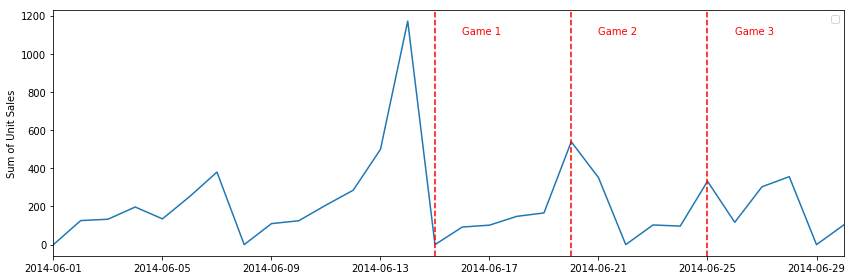

In [77]:
begin_date = '2014-06-01'
end_date ='2014-06-30'
family = 'LIQUOR,WINE,BEER'

plt.figure(figsize = (12,4))
date_filter = (train_45_2014.date >= begin_date) & (train_45_2014.date <=end_date)
family_filter = (train_45_2014.family == family)
temp_df = train_45_2014[date_filter & family_filter][['date','unit_sales']]
temp_df = temp_df.groupby('date').aggregate({'unit_sales':sum})
temp_df = temp_df.reindex(pd.date_range(begin_date, end_date),fill_value=0)
sns.lineplot(data=temp_df)
plt.xlim([begin_date,end_date])
plt.ylabel('Sum of Unit Sales')
plt.axvline('2014-06-15',color='red',linestyle='--')
plt.axvline('2014-06-20',color='red',linestyle='--')
plt.axvline('2014-06-25',color='red',linestyle='--')
plt.annotate('Game 1',['2014-06-16',1100],color='red')
plt.annotate('Game 2',['2014-06-21',1100],color='red')
plt.annotate('Game 3',['2014-06-26',1100],color='red')
plt.legend('')
plt.tight_layout()
plt.savefig(figure_folder + 'world_cup_45_liquor.png');

**Earthquake 2016**

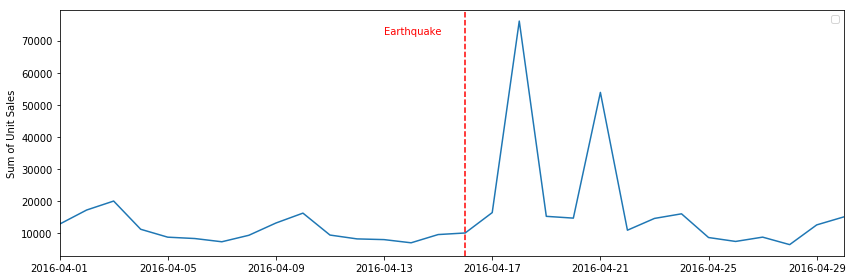

In [80]:
begin_date = '2016-04-01'
end_date= '2016-04-30'
store_nbr = 45
family = 'GROCERY I'
store_filter = (train.store_nbr == store_nbr)
date_filter = (train.date >= begin_date) & (train.date <= end_date)
family_filter = (train.family == family)

temp_df = train[store_filter & date_filter & family_filter][['date','unit_sales']]
temp_df = temp_df.groupby('date').aggregate({'unit_sales':sum})
temp_df = temp_df.reindex(pd.date_range(begin_date,end_date),fill_value=0)

plt.subplots(figsize=(12,4))
sns.lineplot(data = temp_df)
plt.xlim([begin_date,end_date])
plt.ylabel('Sum of Unit Sales')
plt.axvline('2016-04-16',color='red',linestyle='--')
plt.annotate('Earthquake',['2016-04-13',72000],color='red')
plt.legend('')
plt.tight_layout()
plt.savefig(figure_folder + 'earthquake_45.png');

# 4.6 Inferential Statistics

**Focus on Store 45**

In [81]:
import statsmodels.api as sm

In [82]:
store_filter = (train.store_nbr == 45)
train = train[store_filter][['date','item_nbr','family','unit_sales','day_of_week']]
gc.collect()

46609

In [83]:
train.head()

,date,item_nbr,family,unit_sales,day_of_week
7733296,2016-01-01,96995,GROCERY I,0.0,Friday
7733297,2016-01-02,96995,GROCERY I,0.0,Saturday
7733298,2016-01-03,96995,GROCERY I,0.0,Sunday
7733299,2016-01-04,96995,GROCERY I,0.0,Monday
7733300,2016-01-05,96995,GROCERY I,0.0,Tuesday


In [84]:
promo_45_df.head()

,date,item_nbr,onpromotion
id,,,
66540742,2016-01-02,103520,True
66540743,2016-01-02,103665,False
66540744,2016-01-02,105574,False
66540745,2016-01-02,105575,False
66540746,2016-01-02,105577,False


In [85]:
train = train.merge(promo_45_df, how='left', on = ['date','item_nbr'])

In [86]:
train.onpromotion = train.onpromotion.fillna(False)

In [87]:
# find top 10 GROCERY I items in unit sales 
family_filter = (train.family =='GROCERY I')
train[family_filter].groupby('item_nbr')['unit_sales'].sum().sort_values(ascending=False)[:10]

item_nbr
265559     81822.0
314384     75766.0
364606     67614.0
559870     67276.0
414750     54342.0
261052     53071.0
320682     51132.0
964752     48360.0
305080     47325.0
1036689    45986.0
Name: unit_sales, dtype: float64

In [88]:
# find top 10 PRODUCE items in unit sales 
family_filter = (train.family =='PRODUCE')
train[family_filter].groupby('item_nbr')['unit_sales'].sum().sort_values(ascending=False)[:10]

item_nbr
1503844    273478.790
1473474    203113.905
1686656    118280.000
1926217    102842.000
1695835     89800.157
1503847     77313.464
1751174     77252.310
1584575     74172.000
1473410     55139.732
1502392     52450.321
Name: unit_sales, dtype: float64

In [89]:
# find top 10 PRODUCE items in unit sales 
family_filter = (train.family =='LIQUOR,WINE,BEER')
train[family_filter].groupby('item_nbr')['unit_sales'].sum().sort_values(ascending=False)[:10]

item_nbr
1004550    18063.0
1004551    13108.0
812751     11669.0
812757      8390.0
1148018     6587.0
1399750     5716.0
1412392     5660.0
968935      5535.0
968936      4432.0
1080001     4130.0
Name: unit_sales, dtype: float64

In [90]:
date_filter = (train.date >= '2017-01-02')
item = 265559
temp_df = train[(train.item_nbr == item) & date_filter]

In [92]:
temp_df.head()

,date,item_nbr,family,unit_sales,day_of_week,onpromotion
130606,2017-01-02,265559,GROCERY I,299.0,Monday,False
130607,2017-01-03,265559,GROCERY I,166.0,Tuesday,False
130608,2017-01-04,265559,GROCERY I,108.0,Wednesday,False
130609,2017-01-05,265559,GROCERY I,109.0,Thursday,False
130610,2017-01-06,265559,GROCERY I,116.0,Friday,False


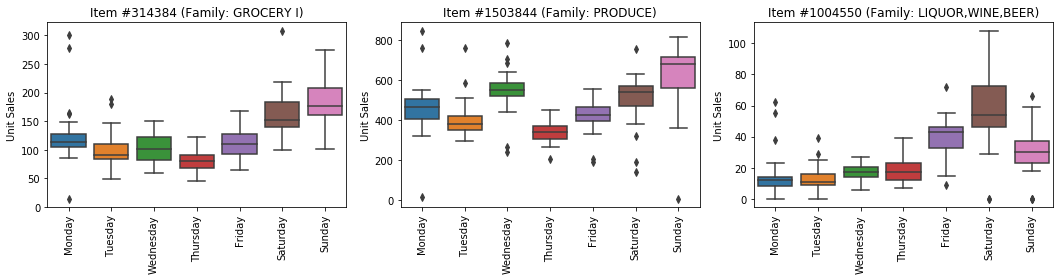

In [93]:
date_filter = (train.date >= '2017-01-02')

item_list = [314384,1503844,1004550]
plt.figure(figsize=(15,4))
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# boxplot for day of the week
for i, item in enumerate(item_list,1):
    temp_df = train[(train.item_nbr == item) & date_filter]
    plt.subplot(1,3,i)
    sns.boxplot(data =temp_df, x='day_of_week', y = 'unit_sales',order=dow_order)
    plt.xticks(rotation = 90)
    plt.xlabel('')
    plt.ylabel('Unit Sales')
    plt.title(f'Item #{item} (Family: {item_family_dict[item]})')
plt.tight_layout()
plt.savefig(figure_folder + 'dow_45_item_boxplot.png');

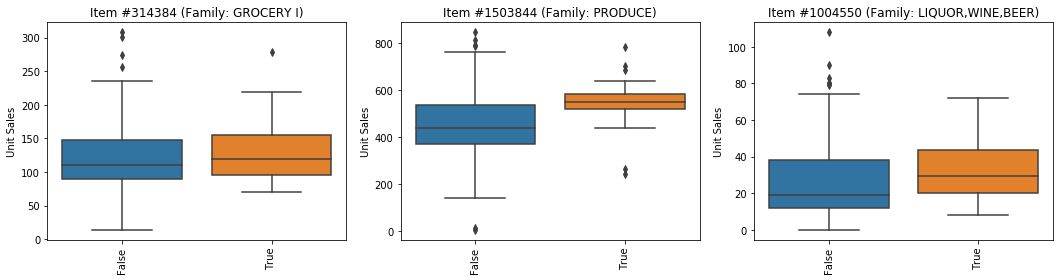

In [97]:
date_filter = (train.date >= '2017-01-02')

item_list = [314384,1503844,1004550]

plt.figure(figsize=(15,4))

# boxplot for day of the week
for i, item in enumerate(item_list,1):
    temp_df = train[(train.item_nbr == item) & date_filter]
    plt.subplot(1,3,i)
    sns.boxplot(data =temp_df, x='onpromotion', y = 'unit_sales')
    plt.xticks(rotation = 90)
    plt.xlabel('')
    plt.ylabel('Unit Sales')
    plt.title(f'Item #{item} (Family: {item_family_dict[item]})')
plt.tight_layout()
plt.savefig(figure_folder + 'onpromotion_45_item_boxplot.png');

### 4.6.3 Statistical Analysis

In [98]:
from collections import OrderedDict
from scipy.stats import kruskal, mannwhitneyu

In [99]:
def pop_eval(df, feature_list,threshold = 20):
    category_testing_summary = pd.DataFrame(OrderedDict({'test':[], 'number of categories':[],'rejected_null_hypothesis':[]}))
    for feature in feature_list:
        filter_ = (df[feature].value_counts() > threshold)
        data_list = []
        var_str = ""
        cat_list = df[feature].value_counts()[filter_].index
        for i, cat in enumerate(cat_list):
            data_list.append(list(df.loc[df[feature] == cat, 'unit_sales'].values))
            var_str = var_str + 'data_list' + "[" + str(i) + "]" + ", "
        
        var_str = var_str[:-2]
        
        num_categories = len(cat_list)
        
        if num_categories > 2:
            s, p = eval('kruskal(' + var_str + ')')
            test_used = 'Kruskal-Wallis'
        elif num_categories == 2:
            s, p = eval('mannwhitneyu('+ var_str + ')')
            test_used = 'MannWhitneyU'
        print(f'Feature: {feature}')
        print(f'Categories: {list(cat_list)}')
        if num_categories ==1:
            rejected = 'NA'
            print(f'Only one category has count above the threshold of {threshold}. No test was performed.')
        elif num_categories > 2:
            print('Test: Kruskal-Wallis Test')
        elif num_categories == 2:
            print('Test: Mann Whitney U Test')
        print(f'The test statistics is {s} and the p-value is {p}.')
        if num_categories > 1:
            if p < 0.05:
                rejected = 'yes'
                print('Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.')
            else:
                print('Null hypothesis NOT rejected. There is not significant evidence the samples are not from the same distribution.')
                rejected = 'no'
            print('\n')
        category_testing_summary.loc[feature] = [test_used, num_categories, rejected]
    return category_testing_summary

In [100]:
item_list = [314384,1503844,1004550]

for item in item_list:
    temp_df = train[train.item_nbr == item]
    print(f'Item #{item} (Family:{item_family_dict[item]})')
    pop_eval(temp_df,['onpromotion','day_of_week'])
    

Item #314384 (Family:GROCERY I)
Feature: onpromotion
Categories: [False, True]
Test: Mann Whitney U Test
The test statistics is 12213.5 and the p-value is 0.017269270833395165.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.


Feature: day_of_week
Categories: ['Friday', 'Saturday', 'Tuesday', 'Monday', 'Sunday', 'Wednesday', 'Thursday']
Test: Kruskal-Wallis Test
The test statistics is 318.1372900444793 and the p-value is 1.0591676663851515e-65.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.


Item #1503844 (Family:PRODUCE)
Feature: onpromotion
Categories: [False, True]
Test: Mann Whitney U Test
The test statistics is 11305.5 and the p-value is 2.474143762457629e-12.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.


Feature: day_of_week
Categories: ['Friday', 'Saturday', 'Tuesday', 'Monday', 'Sunday', 'Wednes

In [ ]:
train.head()

In [ ]:
train['selected'] = train.store_nbr.apply(lambda x: True if x in store_list else False)

In [ ]:
train = train.merge(items[['family']],left_on='item_nbr',right_index=True)

In [ ]:
train[train.family == 'GROCERY I'].groupby('item_nbr')['unit_sales'].sum().sort_values(ascending=False)[:10]

In [ ]:
train[train.family == 'BEVERAGES'].groupby('item_nbr')['unit_sales'].sum().sort_values(ascending=False)[:10]

In [ ]:
train[train.family == 'LIQUOR,WINE,BEER'].groupby('item_nbr')['unit_sales'].sum().sort_values(ascending=False)[:10]

In [ ]:
train[train.family == 'PRODUCE'].groupby('item_nbr')['unit_sales'].sum().sort_values(ascending=False)[:10]

In [ ]:
train = train[train.selected == True]

In [ ]:
gc.collect()

In [ ]:
train.set_index(['store_nbr', 'item_nbr', 'date'],inplace=True)

In [ ]:
train.sort_index(inplace=True)

In [ ]:
train.head()

In [ ]:
store_list = [1,3,9,10,28,45,46]

In [ ]:
store_nbr = 10
item_nbr = 364606
start_date = '2016-01-01'
end_date = '2016-12-31'

temp_df = train.loc[(store_nbr,item_nbr)].loc[start_date:end_date][['unit_sales']].plot()
plt.title(f'Store #{store_nbr}')


In [ ]:
stores.set_index('store_nbr',inplace=True)

In [ ]:
stores.loc[1].type

In [ ]:
item_nbr = 1047679
start_date = '2016-01-01'
end_date = '2016-08-31'


plt.figure(figsize=(15,20)) 
for i, store_nbr in enumerate(store_list[:-1],1):
    plt.subplot(4,2,i)
    train.loc[(store_nbr,item_nbr)].loc[start_date:end_date]['unit_sales'].plot()
    plt.title(f'Store #{store_nbr} Type {stores.loc[store_nbr].type}')
    plt.axvline('2016-08-12',c='r',ls='--')
plt.tight_layout()


In [ ]:
temp_df = train.loc[(slice(None),slice(1503844,1503844)),['unit_sales']]

In [ ]:
temp_df.reset_index().item_nbr.nunique()

In [ ]:
df1= pd.DataFrame({'x':['A','A','B','B'], 'y':[100,200,100,200], 'z':[0,1,2,3]})

In [ ]:
df1.set_index(['x','y'],inplace=True)

In [ ]:
dfdf

In [ ]:
df1.loc[(slice(None),slice(100,199)),:]

In [ ]:
dr = pd.date_range('2019-01-01','2019-01-31')

In [ ]:
l = len(dr)

In [ ]:
df3 = pd.DataFrame({'date':dr,'type':list('A'*l), 'value':range(l)})

In [ ]:
df4 = pd.DataFrame({'date':dr,'type':list('B'*l), 'value':range(100,100+l)})

In [ ]:
df5 = pd.concat([df3,df4])

In [ ]:
df5.dtypes

In [ ]:
sns.lineplot(data=df5, x='date', y = 'value', hue='type')
plt.xticks(rotation=45)

In [ ]:
df5 = df5.set_index(['date','type']).unstack(-1)

In [ ]:
df6 = pd.DataFrame({'x':[1,2,3,4],'y':[10,30,20,50]})

In [ ]:
sns.lineplot(data= df6, x='x',y='y')